In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [101]:
df= pd.read_csv("Mall_Customers.csv")

In [102]:
df.head()

,CustomerID,Genre,Age,Annual Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [103]:
X = df.iloc[:,[3,4]].values

In [104]:
y = df.iloc[:,[2,3]].values

In [125]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [106]:
y.shape

(200, 2)

In [107]:
X.shape

(200, 2)

In [126]:
from sklearn.cluster import KMeans
arr =[]

for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300, n_init = 10, random_state=0)
    kmeans.fit(X_std)
    arr.append(kmeans.inertia_)

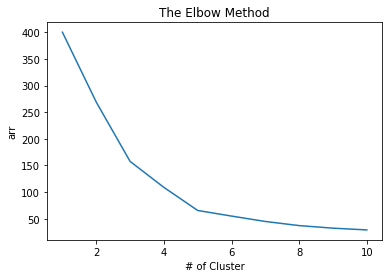

In [127]:
plt.plot(range(1,11),arr)
plt.title("The Elbow Method")
plt.xlabel( "# of Cluster")
plt.ylabel("arr")
plt.show()

In [110]:
# we will use 5 as number of clusters

In [128]:
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_std)

In [129]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

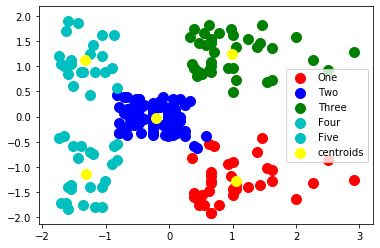

In [130]:
plt.scatter(X_std[y_kmeans==0,0],X[y_kmeans==0,1],s=100, c="red",label="One")
plt.scatter(X_std[y_kmeans==1,0],X[y_kmeans==1,1],s=100, c="blue",label="Two")
plt.scatter(X_std[y_kmeans==2,0],X[y_kmeans==2,1],s=100, c="green",label="Three")
plt.scatter(X_std[y_kmeans==3,0],X[y_kmeans==3,1],s=100, c="c",label="Four")
plt.scatter(X_std[y_kmeans==4,0],X[y_kmeans==4,1],s=100, c="c",label="Five")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c = "yellow", label="centroids")
plt.legend()

In [131]:
labels = KMeans(n_clusters=5, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.5546571631111091


In [132]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=5)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

In [133]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y_kmeans, clusters)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.3468009533289192
The silhoutte score of the Agglomerative Clustering solution: 0.28414274833788056


The ARI score for the agglomerative clustering approach is 0.34, higher than the one for k-means, which was 0.55. However, the silhouette score of the algorithm is 0.26, which is  lower than that of the k-means.

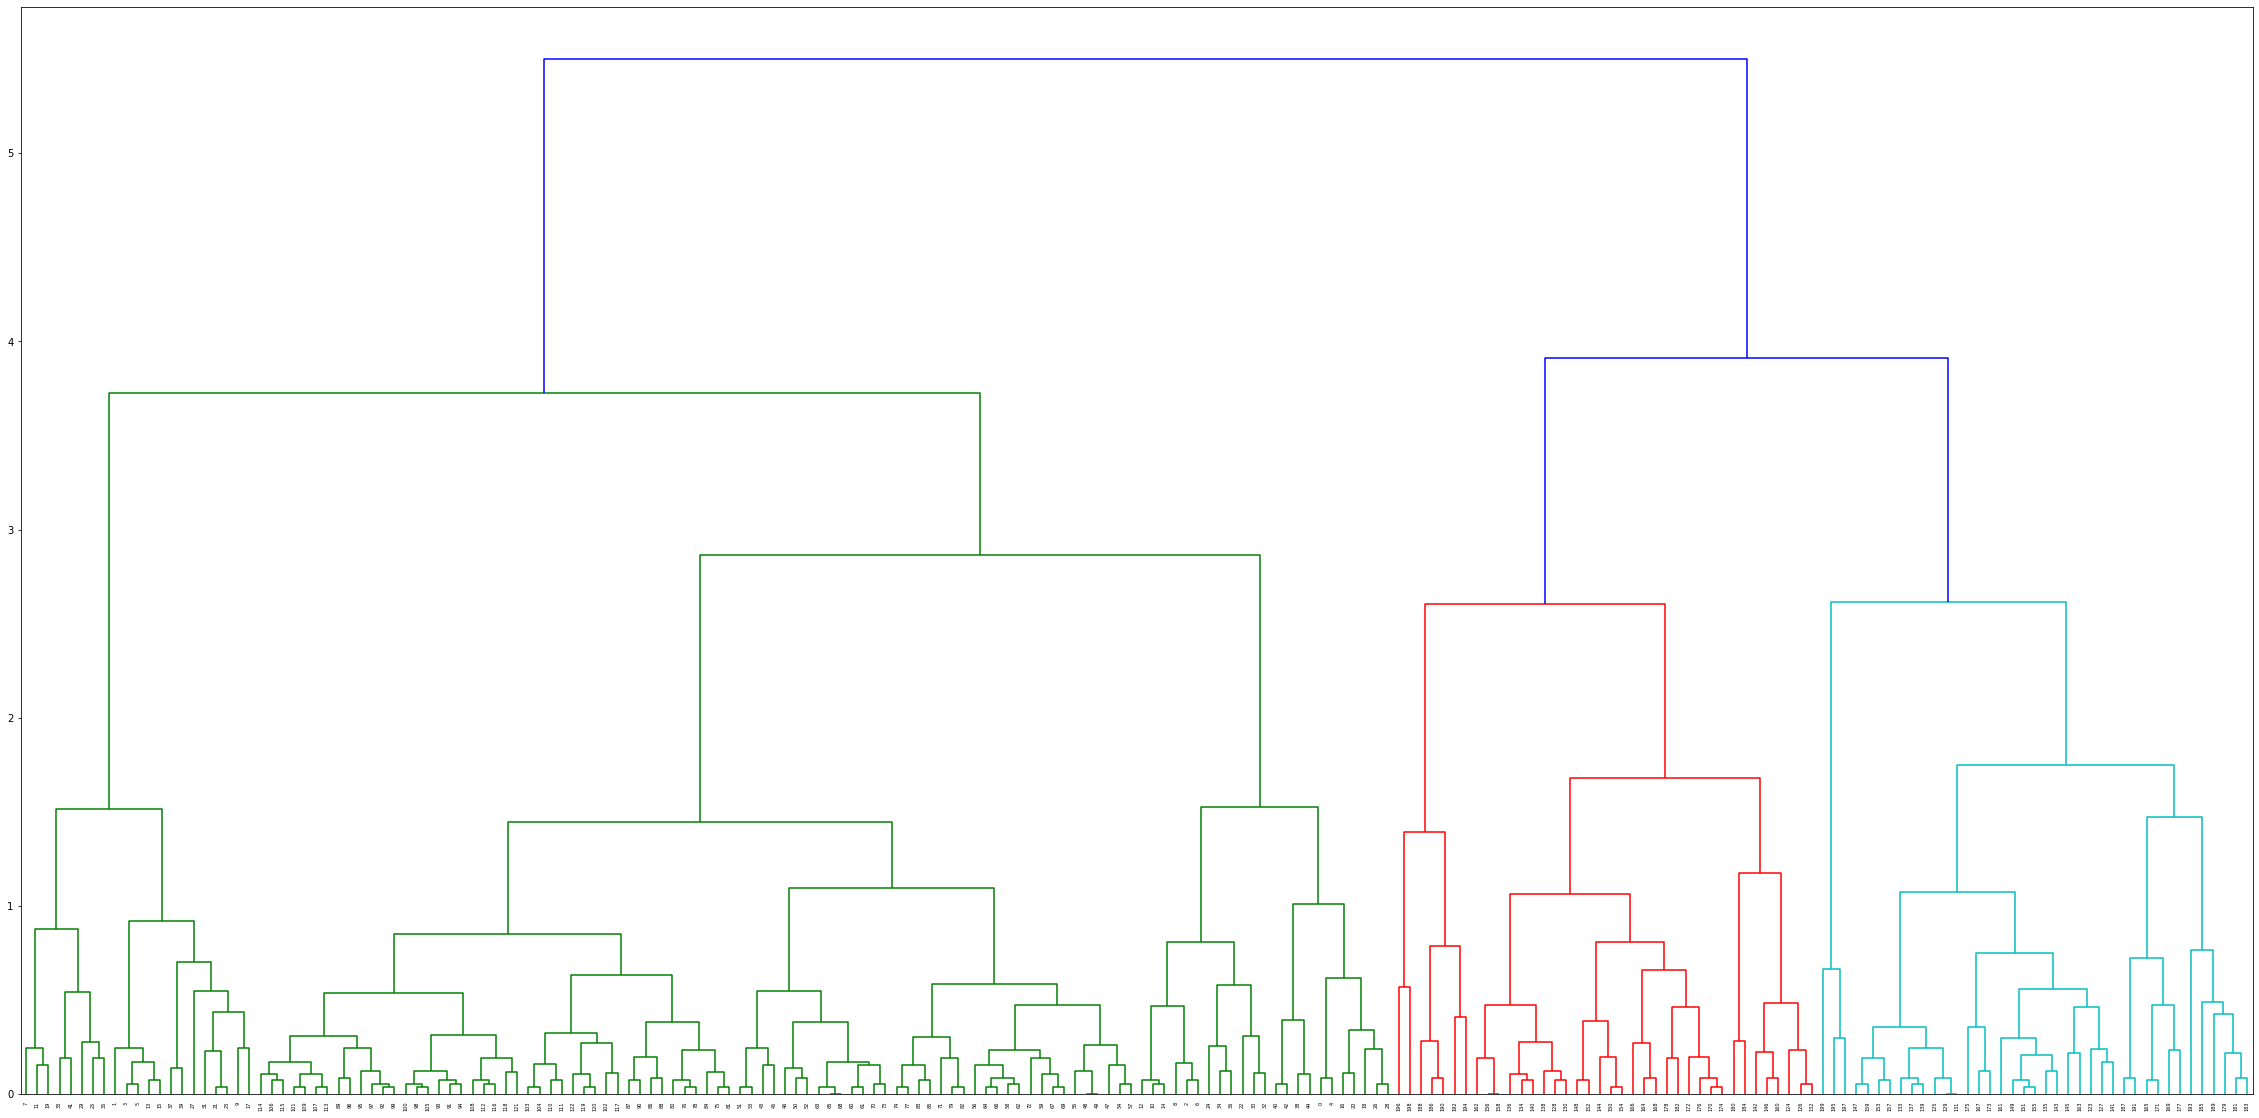

In [134]:
# Below, we sketch the dendrogram using the complete linkage method.
plt.figure(figsize=(40,20))
dendrogram(linkage(X_std, method='complete'))
plt.show()

In [147]:
# Gaussian Mixture Models (GMMs)
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [150]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

In [152]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y_kmeans, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.4151744014231195
The silhoutte score of the GMM solution: 0.43018957138806657


ARI for GMM solution is 0.42, higher than Agglomerative Clustering 0.34.

In [153]:
# re-labeling
clusters = np.array([2 if x == 1 else 1 if x==0 else 0 for x in clusters])

pd.crosstab(y_kmeans,clusters)

col_0,0,1,2
row_0,,,
0,31,4,0
1,0,81,0
2,0,7,32
3,0,22,0
4,0,23,0


In [154]:
#t-SNE
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [155]:
import time
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_std)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.443066
[t-SNE] KL divergence after 250 iterations with early exaggeration: 96.801941
[t-SNE] KL divergence after 300 iterations: 2.375396
t-SNE done! Time elapsed: 1.6480093002319336 seconds
